In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from google.colab import drive
drive.mount('/content/drive')

directory = 'drive/MyDrive/ISYE7750/hw3/'

np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

Mounted at /content/drive


# (1) & (2)

In [3]:
data = pd.read_csv(directory+"uydata.csv",header=None)
data.columns = ['s', 't', 'y']
data

,s,t,y
0,0.803180,0.24513,1.8729
1,0.064122,0.26315,1.6561
2,0.102720,0.48372,1.6545
3,0.418880,0.38129,2.1346
4,0.886770,0.42056,1.8394
...,...,...,...
95,0.716310,0.92134,3.1354
96,0.984020,0.98342,3.3256
97,0.896310,0.86570,3.1251
98,0.800960,0.55498,2.3283


In [4]:
# Scikit-learn test

xdata, ydata = data[['s','t']], data['y']
poly = PolynomialFeatures(degree=2, include_bias=True)
poly_features = poly.fit_transform(xdata)
print(poly.get_feature_names_out(xdata.columns))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, ydata)
print(poly_reg_model.coef_)
print(poly_reg_model.intercept_)

['1' 's' 't' 's^2' 's t' 't^2']
[0.0000 0.9702 0.2255 -0.6339 0.1935 1.2282]
1.2363731764918104


In [5]:
# Add columns to data
data.insert(0, "ones", np.ones(data.shape[0]))
data.insert(3, "s^2", data['s']**2)
data.insert(4, "st", data['s'] * data['t'])
data.insert(5, "t^2", data['t']**2)

data

,ones,s,t,s^2,st,t^2,y
0,1.0,0.803180,0.24513,0.645098,0.196884,0.060089,1.8729
1,1.0,0.064122,0.26315,0.004112,0.016874,0.069248,1.6561
2,1.0,0.102720,0.48372,0.010551,0.049688,0.233985,1.6545
3,1.0,0.418880,0.38129,0.175460,0.159715,0.145382,2.1346
4,1.0,0.886770,0.42056,0.786361,0.372940,0.176871,1.8394
...,...,...,...,...,...,...,...
95,1.0,0.716310,0.92134,0.513100,0.659965,0.848867,3.1354
96,1.0,0.984020,0.98342,0.968295,0.967705,0.967115,3.3256
97,1.0,0.896310,0.86570,0.803372,0.775936,0.749436,3.1251
98,1.0,0.800960,0.55498,0.641537,0.444517,0.308003,2.3283


In [6]:
xdata2 = data.iloc[:,:-1].to_numpy()
ydata2 = data['y'].to_numpy().reshape(-1,1)
n, d = xdata.shape

M = xdata2.T @ xdata2
res = np.linalg.inv(M) @ xdata2.T @ ydata2
print(res)

cost = 0
for i in range(n):
  cost += (ydata2[i] - xdata2[i,:] @ res)**2
cost /= n
print("cost: ", cost)

[[1.2364]
 [0.9702]
 [0.2255]
 [-0.6339]
 [0.1935]
 [1.2282]]
cost:  [0.0388]


# (3)

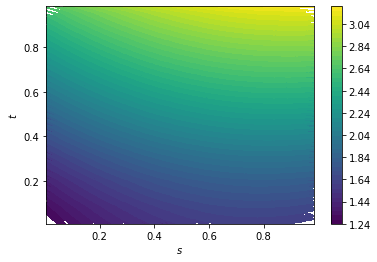

In [ ]:
[S, T] = np.meshgrid(data['s'], data['t'])
Y = res[0][0] + res[1][0]*S + res[2][0]*T + res[3][0]*S**2 + res[4][0]*S*T + res[5][0]*T**2

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(S, T, Y, 50)
ax.set_xlabel("$s$")
ax.set_ylabel("$t$")
fig.colorbar(cp)
plt.savefig(directory + "p1-3_contour.png")                                           

# Problem 2

In [7]:
delta = 0.1
Q = np.array(
    [[4/3, 0, 0.5, 1, 0, 0],
     [0, 4/3, 0.5, 0, 1, 0],
     [0.5, 0.5, 2/3, 0.5, 0.5, 0],
     [1, 0, 0.5, 1, 0, 0],
     [0, 1, 0.5, 0, 1, 0],
     [0, 0, 0, 0, 0, 0]]
)

xdata2 = data.iloc[:,:-1].to_numpy()
ydata2 = data['y'].to_numpy().reshape(-1,1)
n, d = xdata.shape

res1 = np.linalg.inv(xdata2.T @ xdata2 + delta * Q) @ xdata2.T @ ydata2
print(res1)

cost = 0
for i in range(n):
  cost += (ydata2[i] - xdata2[i,:] @ res1)**2
cost /= n
print("cost: ", cost)

[[1.2692]
 [0.9215]
 [0.0673]
 [-0.5478]
 [0.1128]
 [1.4129]]
cost:  [0.0390]


In [8]:
delta = 5
Q = np.array(
    [[4/3, 0, 0.5, 1, 0, 0],
     [0, 4/3, 0.5, 0, 1, 0],
     [0.5, 0.5, 2/3, 0.5, 0.5, 0],
     [1, 0, 0.5, 1, 0, 0],
     [0, 1, 0.5, 0, 1, 0],
     [0, 0, 0, 0, 0, 0]]
)

xdata2 = data.iloc[:,:-1].to_numpy()
ydata2 = data['y'].to_numpy().reshape(-1,1)
n, d = xdata.shape

res = np.linalg.inv(xdata2.T @ xdata2 + delta * Q) @ xdata2.T @ ydata2
print(res)

cost = 0
for i in range(n):
  cost += (ydata2[i] - xdata2[i,:] @ res)**2
cost /= n
print("cost: ", cost)

[[1.2968]
 [1.0351]
 [-0.6494]
 [-0.5005]
 [-0.4338]
 [2.4727]]
cost:  [0.0512]


In [14]:
delta = 25
Q = np.array(
    [[4/3, 0, 0.5, 1, 0, 0],
     [0, 4/3, 0.5, 0, 1, 0],
     [0.5, 0.5, 2/3, 0.5, 0.5, 0],
     [1, 0, 0.5, 1, 0, 0],
     [0, 1, 0.5, 0, 1, 0],
     [0, 0, 0, 0, 0, 0]]
)

xdata2 = data.iloc[:,:-1].to_numpy()
ydata2 = data['y'].to_numpy().reshape(-1,1)
n, d = xdata.shape

res = np.linalg.inv(xdata2.T @ xdata2 + delta * Q) @ xdata2.T @ ydata2
print(res)

cost = 0
for i in range(n):
  cost += (ydata2[i] - xdata2[i,:] @ res)**2
cost /= n
print("cost: ", cost)

[[1.0760]
 [0.8496]
 [-0.4538]
 [-0.5372]
 [-0.4840]
 [2.7897]]
cost:  [0.1198]


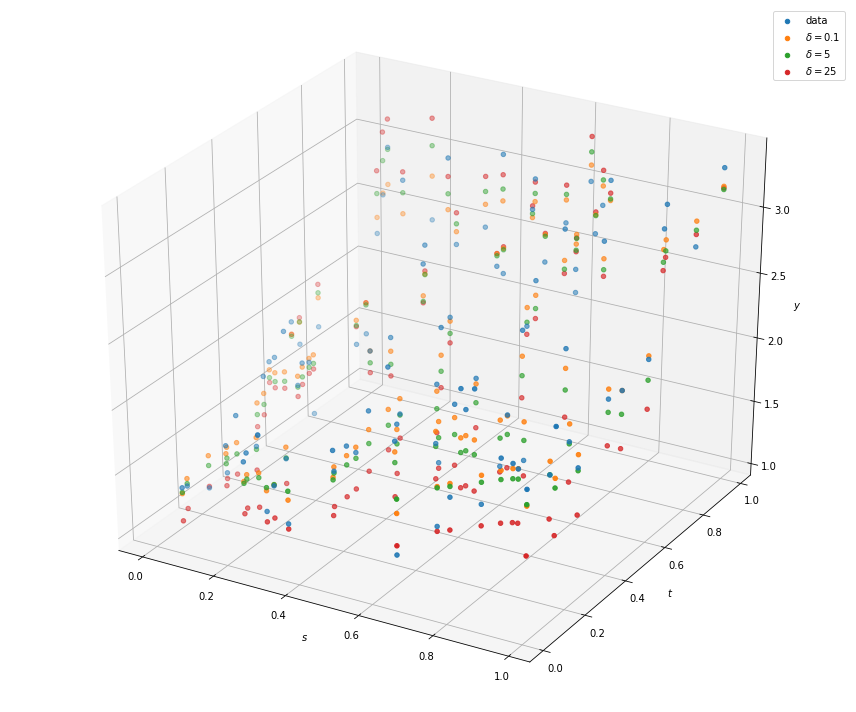

In [24]:
delta = [0.1, 5, 25]
Q = np.array(
    [[4/3, 0, 0.5, 1, 0, 0],
     [0, 4/3, 0.5, 0, 1, 0],
     [0.5, 0.5, 2/3, 0.5, 0.5, 0],
     [1, 0, 0.5, 1, 0, 0],
     [0, 1, 0.5, 0, 1, 0],
     [0, 0, 0, 0, 0, 0]]
)

xdata2 = data.iloc[:,:-1].to_numpy()
ydata2 = data['y'].to_numpy().reshape(-1,1)
n, d = xdata.shape

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data['s'], data['t'], data['y'], label="data")
sval = np.linspace(0,1,1000)
for d in delta:
  res = np.linalg.inv(xdata2.T @ xdata2 + d * Q) @ xdata2.T @ ydata2
  out = []
  for i in range(n):
    tmp = xdata2[i,:] @ res
    out.append(tmp[0])
  ax.scatter3D(data['s'], data['t'], out, label="$\delta="+str(d)+"$")
ax.legend()
ax.set_xlabel('$s$')
ax.set_ylabel('$t$')
ax.set_zlabel('$y$')
plt.tight_layout()
plt.savefig(directory + "p2-scatter.png")